I’m recently started to be interested in data analysis and it is my first visualization. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

global_temp_country = pd.read_csv('./input/GlobalLandTemperaturesByCountry.csv')

##1) 先標示出每個國家的均溫

In [18]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

##2) 依照平均溫度畫出水平座標

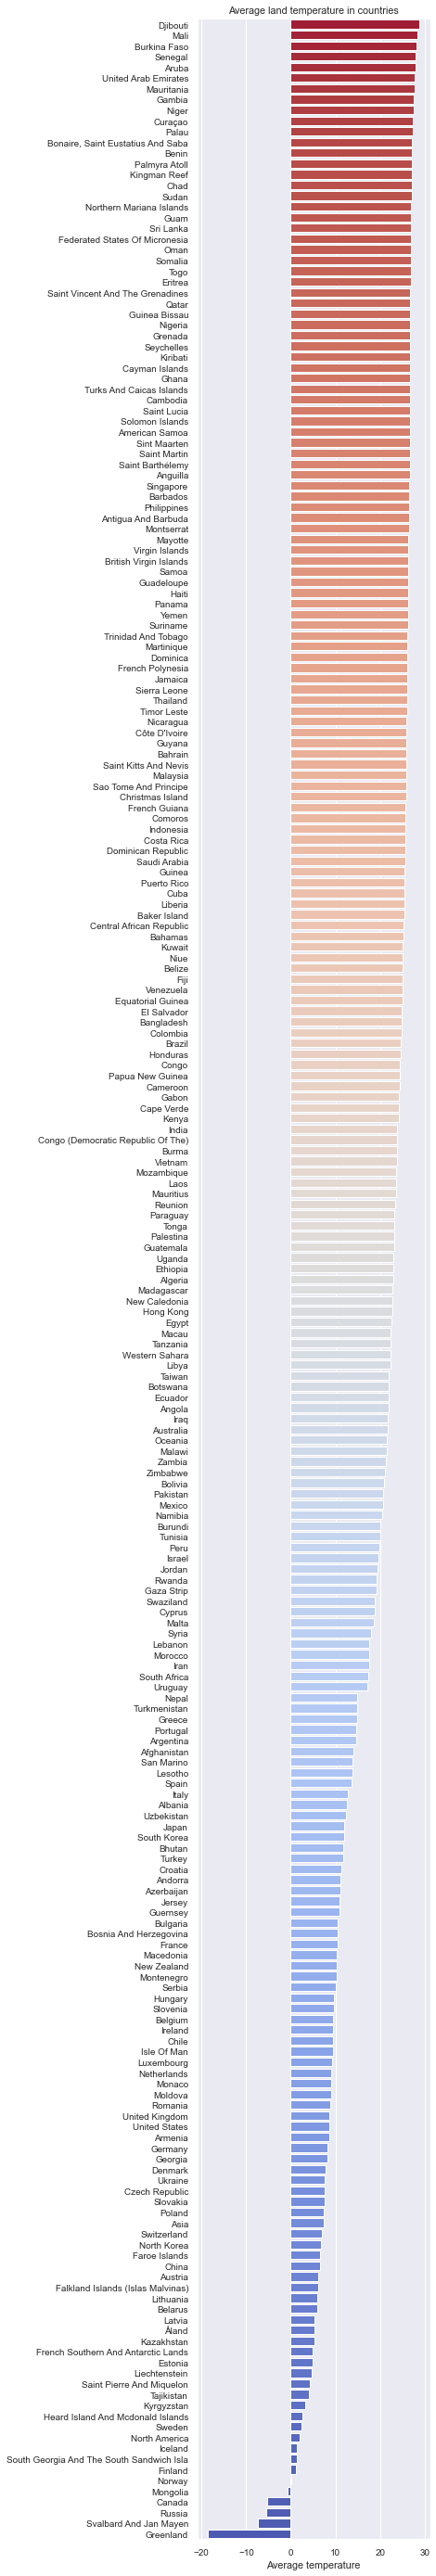

In [3]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

## 3) 真的有全球暖化嗎?

In [50]:
global_temp = pd.read_csv("./input/GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(107,142,35)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(107,142,35)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='全球陸地均溫',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

Let’s look at the chart of annual temperature changes in certain continents (we take into consideration one country per continent and mark Greenland as the coldest place on Earth).

In [51]:
# Read the data
data = pd.read_csv("./input/GlobalTemperatures.csv")

# Make a copy of the data for future graphs
copy = data.copy()

# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(199, 121, 093)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

In [48]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'China', 'Taiwan']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['blue', 'green', 'red',
          'yellow', 'pink', 'black','orange']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

We can see that since the 1980 there has been a continuous increase in mean annual temperature for the countries, which we take into consideration (particularly strong dynamics can be seen in the cold countries). The interruption of the temperature values on the chart is due to the lack of observations in these years.
    我們可以看到自從1980年以後幾乎所有國家都開始有些微的溫度上升,

##The results

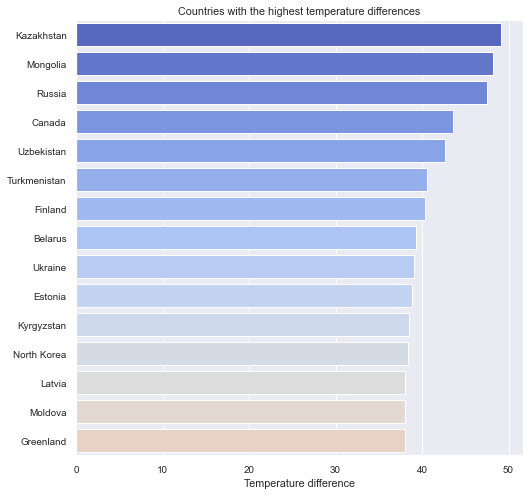

In [30]:
temp_by_country = pd.read_csv('./input/GlobalLandTemperaturesByCountry.csv')
countries = temp_by_country['Country'].unique()

max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = temp_by_country[temp_by_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

During my research it was found that there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind. In more developed countries the temperature began to register much earlier. Over time the accuracy of the observations is increased, that is quite natural. Mankind must reflect and take all necessary remedies to reduce emissions of greenhouse gases in the atmosphere. This work was entirely done using python and "plotly". I had received practical skills and knowledge in python and in awesome library for data visualisation.

End thoughts
Unanswered question: why is the "Cold Weather" getting hotter more rapidly than the "Hot Weather"? If you have any knowledge, please start a conversation in the comments, because I am dying to know.

As always, I hope that this small analysis inspires people and makes them a smidge more conscious about what surrounds us and how we can start making a positive impact on these changes.

Cheers! 😃

In [37]:
from plotly.subplots import make_subplots

# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.

data.dropna(axis = 0, inplace = True)

# Dealing with the DATE
data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format

data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
data2['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(2)

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)


In [52]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

In [53]:
# Read the file (countries + cities)
countries = pd.read_csv("./input/GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("./input/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continent's temperature increase in Average", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)

In [44]:
# Data
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 3500, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

In [46]:
import plotly.express as px
# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, we will add 6 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map - Temperature increase')
fig.show()

In [47]:
# Calculating the difference column
mean = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()
maximum = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()
difference = pd.merge(left = mean, right = maximum, on = ['region','Country','alpha-3'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']
difference.rename(columns = {'AverageTemperature_y':'Maximum Average Temperature',
                             'AverageTemperature_y':'Overall Avg Temp'}, inplace = True)

# Figure
fig = px.scatter_geo(difference, locations="alpha-3", color="Overall Avg Temp", #we color by average temp
                     hover_name="Country", size="diff", size_max=15, #we size by how big is the difference
                     projection="natural earth", opacity = 0.8,
                     color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
                     title = 'Global Map - difference between the mean and max temperatures')
fig.show()